In [1]:
import os
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time


In [2]:
dir = 'Data/ActiveTravelCounts'
counts_df = pd.read_parquet(os.path.join(dir, 'counts_cleaned.parquet'))

In [3]:
counts_df.sample(5)

,Year,UnqID,Zone,datetime,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count,isdry,ispeak,isCarriageway,isPavement,isCycle,isBus,isShared
58778,2022,INNCY031,1,2022-06-14 12:30:00,14/06/2022,Dry,12:30:00,Weekday,A,Eastbound,Pavement,E-scooters,0,1,0,0,1,0,0,0
776114,2022,INNCY479,1,2022-07-06 18:30:00,06/07/2022,Dry,18:30:00,Weekday,A,Westbound,Carriageway,Cargo bikes,0,1,1,1,0,0,0,0
317507,2022,INNCY174,1,2022-05-24 06:45:00,24/05/2022,Wet,06:45:00,Weekday,A,Eastbound,Pavement,Conventional cycles,0,0,1,0,1,0,0,0
613822,2022,INNCY371,1,2022-07-06 21:30:00,06/07/2022,Dry,21:30:00,Weekday,A,Westbound,Carriageway,Cargo bikes,0,1,0,1,0,0,0,0
348441,2022,INNCY193,1,2022-07-07 12:15:00,07/07/2022,Dry,12:15:00,Weekday,A,Southbound,Pavement,Cargo bikes,0,1,0,0,1,0,0,0


In [4]:
cycles_counts_df = counts_df[counts_df['Mode'] == 'Conventional cycles']
cycles_counts_df.sample(5)

,Year,UnqID,Zone,datetime,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count,isdry,ispeak,isCarriageway,isPavement,isCycle,isBus,isShared
569179,2022,OUTCY348,2,2022-07-19 12:45:00,19/07/2022,Dry,12:45:00,Weekday,A,Northbound,Carriageway,Conventional cycles,1,1,0,1,0,0,0,0
758782,2022,INNCY467,1,2022-07-05 21:30:00,05/07/2022,Dry,21:30:00,Weekday,A,Southbound,Pavement,Conventional cycles,0,1,0,0,1,0,0,0
142709,2022,CENCY071,0,2022-07-12 19:15:00,12/07/2022,Dry,19:15:00,Weekday,A,Northbound,Cycle lane,Conventional cycles,0,1,0,0,0,1,0,0
161857,2022,INNCY087,1,2022-07-12 06:15:00,12/07/2022,Dry,06:15:00,Weekday,A,Southbound,Pavement,Conventional cycles,0,1,0,0,1,0,0,0
246885,2022,INNCY135,1,2022-06-08 15:15:00,08/06/2022,Dry,15:15:00,Weekday,A,Northbound,Carriageway,Conventional cycles,39,1,0,1,0,0,0,0


In [5]:
cycles_counts_df.to_csv("out.csv")

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('out.csv')
summed_counts = df['Count'].sum()
print(summed_counts)

1695403


In [7]:
df = pd.read_csv('out.csv')
summed_counts = df['Count'].sum()
print(summed_counts)
df.set_index('Time', inplace=True)
average_cycling_count = df.groupby(['Time','Zone']).Count.mean()
average_cycling_count_df = average_cycling_count.reset_index()
descriptive_stats = average_cycling_count_df['Count'].describe()
print(descriptive_stats)

1695403
count    192.000000
mean       3.565082
std        3.528717
min        0.335737
25%        0.930941
50%        2.553317
75%        4.743015
max       16.864734
Name: Count, dtype: float64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

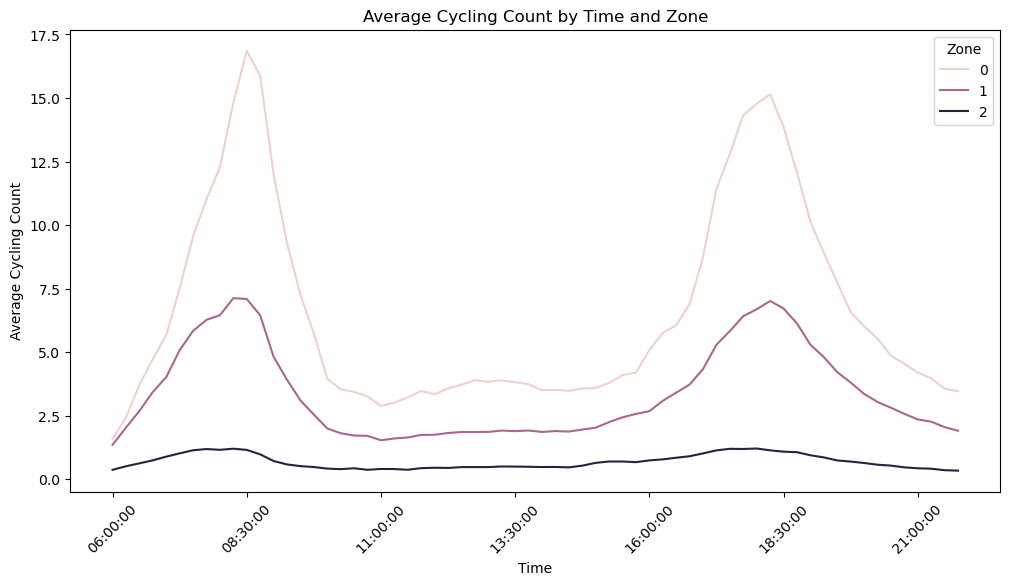

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_cycling_count_df, x='Time', y='Count', hue='Zone')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title('Average Cycling Count by Time and Zone')
plt.xlabel('Time')
plt.ylabel('Average Cycling Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#It is clear to see that within the sample interval, the variation in the number of cycling uses throughout the London borough over the day shows two peaks - i.e. two peaks at 8:30am and 18:30pm.
#Also during peak hours, cycle use in central London is approximately twice as high as the combined inner and outer London use, reaching an average use of 15 over-tacks per 15 minutes.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

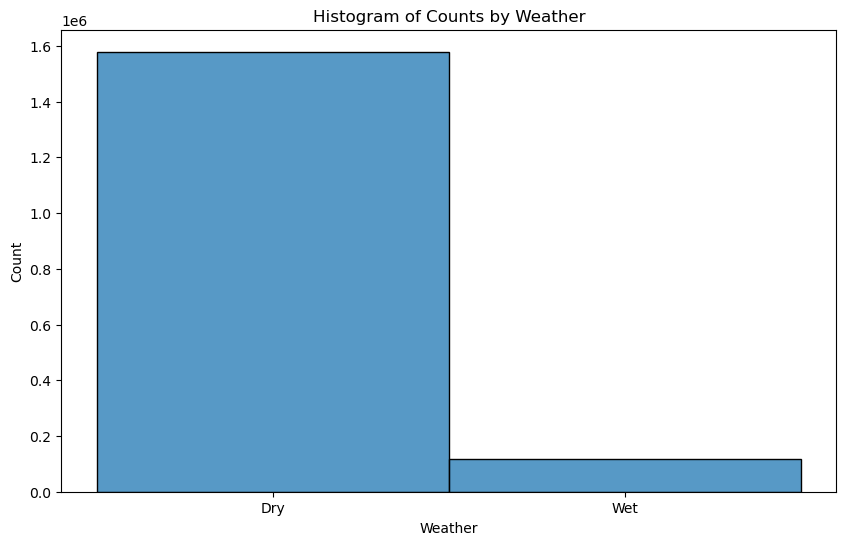

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('out.csv')
data = data.drop(columns=['isPavement'])

plt.figure(figsize=(10, 6))
sns.histplot(data, x='Weather', weights='Count', bins=len(data['Weather'].unique()))
plt.title('Histogram of Counts by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_126/3312430163.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.hour
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.typ

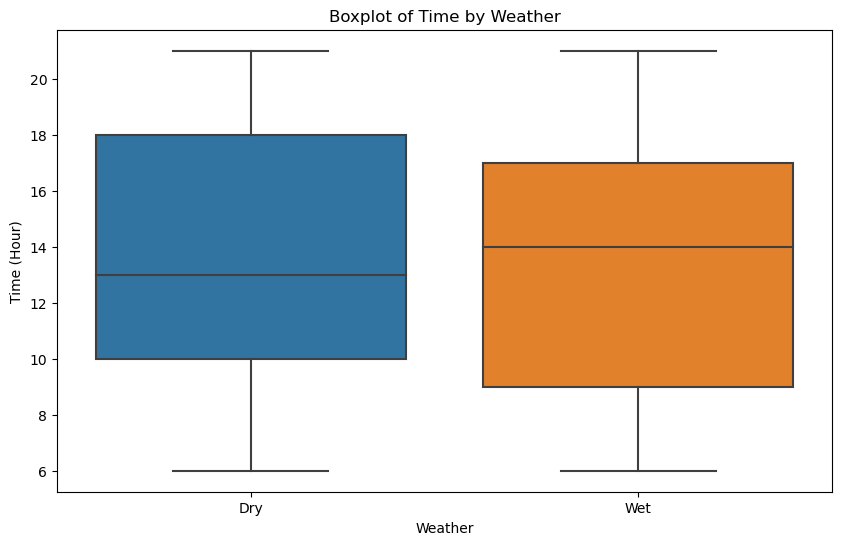

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('out.csv')
data = data.drop(columns=['isPavement'])

# Converting 'Time' to a datetime object for better handling in the new dataset
data['Time'] = pd.to_datetime(data['Time']).dt.hour

# Creating a boxplot to show the relationship between 'Weather' and 'Time' in the new dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Time', data=data)
plt.title('Boxplot of Time by Weather')
plt.xlabel('Weather')
plt.ylabel('Time (Hour)')
plt.show()


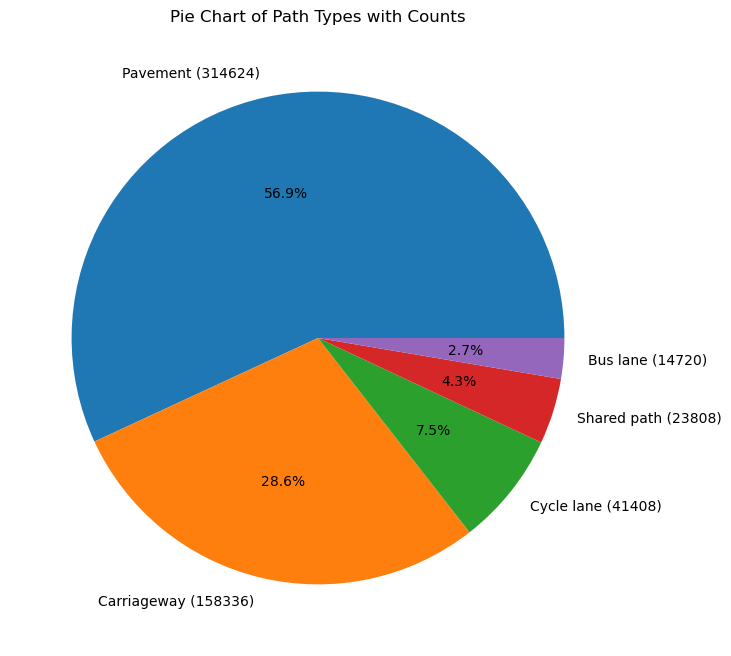

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('out.csv')

# Calculating the count of different types of paths
path_counts = data['Path'].value_counts()

# Creating a pie chart with count numbers
plt.figure(figsize=(8, 8))
path_counts.plot(kind='pie', labels=['{} ({})'.format(path, count) for path, count in path_counts.items()],
                 autopct='%1.1f%%')
plt.title('Pie Chart of Path Types with Counts')
plt.ylabel('')  
# Removing the y-label as it's not needed for pie charts
plt.show()